# Flight Delay Prediction: A Random Forest Approach
## Objective
The goal of this project is to build a predictive model to classify flights as **delayed** or **on-time** based on various post-departure flight attributes.

## Dataset
The dataset is adopted from Kaggle's [Flight Delay and Cancellation Dataset (2019-2023)](https://www.kaggle.com/datasets/patrickzel/flight-delay-and-cancellation-dataset-2019-2023)

Explanation of Each Column in the Dataset

1. **FL_DATE**: Date of the flight.
2. **AIRLINE**: Name of the airline.
3. **AIRLINE_DOT**: DOT identifier for the airline.
4. **AIRLINE_CODE**: Code assigned to the airline.
5. **DOT_CODE**: DOT identifier.
6. **FL_NUMBER**: Flight number.
7. **ORIGIN**: Origin airport code.
8. **ORIGIN_CITY**: City of the origin airport.
9. **DEST**: Destination airport code.
10. **DEST_CITY**: City of the destination airport.
11. **CRS_DEP_TIME**: Scheduled departure time.
12. **DEP_TIME**: Actual departure time.
13. **DEP_DELAY**: Departure delay.
14. **TAXI_OUT**: Time spent taxiing out.
15. **WHEELS_OFF**: Time when the aircraft's wheels leave the ground.
16. **WHEELS_ON**: Time when the aircraft's wheels touch the ground.
17. **TAXI_IN**: Time spent taxiing in.
18. **CRS_ARR_TIME**: Scheduled arrival time.
19. **ARR_TIME**: Actual arrival time.
20. **ARR_DELAY**: Arrival delay.
21. **CANCELLED**: Indicator if the flight was cancelled (1 for cancelled, 0 for not cancelled).
22. **CANCELLATION_CODE**: Reason for cancellation (if applicable).
23. **DIVERTED**: Indicator if the flight was diverted (1 for diverted, 0 for not diverted).
24. **CRS_ELAPSED_TIME**: Scheduled elapsed time.
25. **ELAPSED_TIME**: Actual elapsed time.
26. **AIR_TIME**: Time spent in the air.
27. **DISTANCE**: Distance traveled.
28. **DELAY_DUE_CARRIER**: Delay due to carrier.
29. **DELAY_DUE_WEATHER**: Delay due to weather.
30. **DELAY_DUE_NAS**: Delay due to National Airspace System (NAS).
31. **DELAY_DUE_SECURITY**: Delay due to security.
32. **DELAY_DUE_LATE_AIRCRAFT**: Delay due to late aircraft arrival.



In [1]:
import pandas as pd
import datetime
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 

pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('flights_sample_3m.csv')

df.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",1155,1151.0,-4.0,19.0,1210.0,1443.0,4.0,1501,1447.0,-14.0,0.0,NaN,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",2120,2114.0,-6.0,9.0,2123.0,2232.0,38.0,2315,2310.0,-5.0,0.0,NaN,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",954,1000.0,6.0,20.0,1020.0,1247.0,5.0,1252,1252.0,0.0,0.0,NaN,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",1609,1608.0,-1.0,27.0,1635.0,1844.0,9.0,1829,1853.0,24.0,0.0,NaN,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",1840,1838.0,-2.0,15.0,1853.0,2026.0,14.0,2041,2040.0,-1.0,0.0,NaN,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 32 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   FL_DATE                  object 
 1   AIRLINE                  object 
 2   AIRLINE_DOT              object 
 3   AIRLINE_CODE             object 
 4   DOT_CODE                 int64  
 5   FL_NUMBER                int64  
 6   ORIGIN                   object 
 7   ORIGIN_CITY              object 
 8   DEST                     object 
 9   DEST_CITY                object 
 10  CRS_DEP_TIME             int64  
 11  DEP_TIME                 float64
 12  DEP_DELAY                float64
 13  TAXI_OUT                 float64
 14  WHEELS_OFF               float64
 15  WHEELS_ON                float64
 16  TAXI_IN                  float64
 17  CRS_ARR_TIME             int64  
 18  ARR_TIME                 float64
 19  ARR_DELAY                float64
 20  CANCELLED                float64
 21  CANCELLA

In [6]:
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'], format='%Y-%m-%d')

## Data cleaning process

1. **Filtering Relevant Flights**: Only flights that were successfully carried out and reached their intended destination were included. Flights that were **diverted** or **cancelled** were filtered out.

2. **Handling Missing Values**:
- Columns with a high proportion of missing values were dropped.
- Rows with missing values in columns with a low proportion of missing data were removed.

3. **Timestamp Standardization**: All timestamps, originally recorded as **int64** or **float64**, were reformatted to a consistent and interpretable datetime format.

4. **Taxi Time Validation**: Taxi-in and taxi-out times were cross-checked to ensure consistency in their calculations and alignment with other flight duration data.

In [7]:
df = df.drop(df[df.CANCELLED == True].index)

In [8]:
df = df.drop(df[df.DIVERTED == True].index)

In [9]:
def checkMissing(data, perc=0):
    """ 
    Takes in a dataframe and returns
    the percentage of missing values for columns that have missing data.
    """
    missing = [(i, data[i].isna().mean() * 100) for i in data]
    missing = pd.DataFrame(missing, columns=["column_name", "percentage"])
    # Filter out columns with no missing values and those below the threshold `perc`
    missing = missing[missing.percentage > perc]
    print(missing.sort_values("percentage", ascending=False).reset_index(drop=True))

print("Proportion of missing data in columns")
checkMissing(df)

Proportion of missing data in columns
                column_name  percentage
0         CANCELLATION_CODE  100.000000
1         DELAY_DUE_CARRIER   81.678143
2         DELAY_DUE_WEATHER   81.678143
3             DELAY_DUE_NAS   81.678143
4        DELAY_DUE_SECURITY   81.678143
5   DELAY_DUE_LATE_AIRCRAFT   81.678143
6                 WHEELS_ON    0.000069
7                   TAXI_IN    0.000069
8                  ARR_TIME    0.000069
9                 ARR_DELAY    0.000069
10             ELAPSED_TIME    0.000069
11                 AIR_TIME    0.000069


In [10]:
# Drop columns with high missing values
columns_to_drop = ['CANCELLATION_CODE', 'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 
                   'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']
df = df.drop(columns=columns_to_drop)

# Drop rows with missing values for columns with low missing values
df = df.dropna(subset=['WHEELS_ON', 'TAXI_IN', 'ARR_TIME', 'ARR_DELAY', 'ELAPSED_TIME', 'AIR_TIME'])

In [11]:
# Function to convert 'HHMM' string to datetime.time
def format_hour(string):
    if pd.isnull(string):
        return np.nan
    else:
        if string == '2400':
            string = '0000'
        string = '{0:04d}'.format(int(string))
        # Extract hour and minute parts
        hour = int(string[0:2])
        minute = int(string[2:4])
        # Handle special case
        if hour == 24:
            hour = 0
        # Return datetime.time object
        time = datetime.time(hour, minute)
        return time

# Apply the function to the desired columns
df['DEP_TIME'] = df['DEP_TIME'].apply(format_hour)
df['CRS_DEP_TIME'] = df['CRS_DEP_TIME'].apply(format_hour)
df['CRS_ARR_TIME'] = df['CRS_ARR_TIME'].apply(format_hour)
df['ARR_TIME'] = df['ARR_TIME'].apply(format_hour)
df['WHEELS_OFF'] = df['WHEELS_OFF'].apply(format_hour)
df['WHEELS_ON'] = df['WHEELS_ON'].apply(format_hour)

In [12]:
df[['DEP_TIME','CRS_DEP_TIME','ARR_TIME','CRS_ARR_TIME','WHEELS_OFF','WHEELS_ON']].head(5)

,DEP_TIME,CRS_DEP_TIME,ARR_TIME,CRS_ARR_TIME,WHEELS_OFF,WHEELS_ON
0,11:51:00,11:55:00,14:47:00,15:01:00,12:10:00,14:43:00
1,21:14:00,21:20:00,23:10:00,23:15:00,21:23:00,22:32:00
2,10:00:00,09:54:00,12:52:00,12:52:00,10:20:00,12:47:00
3,16:08:00,16:09:00,18:53:00,18:29:00,16:35:00,18:44:00
4,18:38:00,18:40:00,20:40:00,20:41:00,18:53:00,20:26:00


In [13]:
# Function to calculate time difference in minutes
def time_difference(actual, plan):
    # Convert to datetime objects
    actual_time = pd.to_datetime(actual, format='%H:%M:%S')
    plan_time = pd.to_datetime(plan, format='%H:%M:%S')
        
    # Calculate initial time difference
    time_diff = (actual_time - plan_time).dt.total_seconds() / 60

    # Handle crossing midnight by adding 24 hours where necessary
    midnight_adjust = (time_diff < 0) & (plan_time.dt.hour >= 23)
    time_diff[midnight_adjust] += 24 * 60  # Add 24 hours in minutes    

    return time_diff

# Apply the function and filter out incorrect records
df['WHEELS_OFF_elapse'] = time_difference(df['WHEELS_OFF'], df['DEP_TIME'])
df['WHEELS_ON_elapse'] = time_difference(df['ARR_TIME'], df['WHEELS_ON'])

# Remove records where time difference is negative or NaN
df = df.dropna(subset=['WHEELS_OFF_elapse', 'WHEELS_ON_elapse'])
df = df[(df['WHEELS_OFF_elapse'] > 0) & (df['WHEELS_ON_elapse'] > 0)]

In [14]:
check_wheels_off = np.isclose(df['WHEELS_OFF_elapse'], df['TAXI_OUT'], rtol=1e-05, atol=1e-08, equal_nan=True)
check_wheels_on = np.isclose(df['WHEELS_ON_elapse'], df['TAXI_IN'], rtol=1e-05, atol=1e-08, equal_nan=True)

print("Mismatch in WHEELS_OFF_elapse and TAXI_OUT:", (~check_wheels_off).sum())
print("Mismatch in WHEELS_ON_elapse and TAXI_IN:", (~check_wheels_on).sum())

mismatch_on = df[~np.isclose(df['WHEELS_ON_elapse'], df['TAXI_IN'], rtol=1e-05, atol=1e-08, equal_nan=True)]
print(mismatch_on[['FL_DATE','FL_NUMBER','WHEELS_ON_elapse', 'TAXI_IN', 'ARR_TIME', 'WHEELS_ON']])
df = df.drop(mismatch_on.index)

Mismatch in WHEELS_OFF_elapse and TAXI_OUT: 0
Mismatch in WHEELS_ON_elapse and TAXI_IN: 1
           FL_DATE  FL_NUMBER  WHEELS_ON_elapse  TAXI_IN  ARR_TIME WHEELS_ON
2413578 2021-08-01       1608             185.0    187.0  03:02:00  23:57:00


In [15]:
df.head(5)

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_OFF_elapse,WHEELS_ON_elapse
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",11:55:00,11:51:00,-4.0,19.0,12:10:00,14:43:00,4.0,15:01:00,14:47:00,-14.0,0.0,0.0,186.0,176.0,153.0,1065.0,19.0,4.0
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",21:20:00,21:14:00,-6.0,9.0,21:23:00,22:32:00,38.0,23:15:00,23:10:00,-5.0,0.0,0.0,235.0,236.0,189.0,1399.0,9.0,38.0
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",09:54:00,10:00:00,6.0,20.0,10:20:00,12:47:00,5.0,12:52:00,12:52:00,0.0,0.0,0.0,118.0,112.0,87.0,680.0,20.0,5.0
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",16:09:00,16:08:00,-1.0,27.0,16:35:00,18:44:00,9.0,18:29:00,18:53:00,24.0,0.0,0.0,260.0,285.0,249.0,1589.0,27.0,9.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",18:40:00,18:38:00,-2.0,15.0,18:53:00,20:26:00,14.0,20:41:00,20:40:00,-1.0,0.0,0.0,181.0,182.0,153.0,985.0,15.0,14.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2913616 entries, 0 to 2999999
Data columns (total 28 columns):
 #   Column             Dtype         
---  ------             -----         
 0   FL_DATE            datetime64[ns]
 1   AIRLINE            object        
 2   AIRLINE_DOT        object        
 3   AIRLINE_CODE       object        
 4   DOT_CODE           int64         
 5   FL_NUMBER          int64         
 6   ORIGIN             object        
 7   ORIGIN_CITY        object        
 8   DEST               object        
 9   DEST_CITY          object        
 10  CRS_DEP_TIME       object        
 11  DEP_TIME           object        
 12  DEP_DELAY          float64       
 13  TAXI_OUT           float64       
 14  WHEELS_OFF         object        
 15  WHEELS_ON          object        
 16  TAXI_IN            float64       
 17  CRS_ARR_TIME       object        
 18  ARR_TIME           object        
 19  ARR_DELAY          float64       
 20  CANCELLED          float64   

In [17]:
df.isna().sum()

FL_DATE              0
AIRLINE              0
AIRLINE_DOT          0
AIRLINE_CODE         0
DOT_CODE             0
FL_NUMBER            0
ORIGIN               0
ORIGIN_CITY          0
DEST                 0
DEST_CITY            0
CRS_DEP_TIME         0
DEP_TIME             0
DEP_DELAY            0
TAXI_OUT             0
WHEELS_OFF           0
WHEELS_ON            0
TAXI_IN              0
CRS_ARR_TIME         0
ARR_TIME             0
ARR_DELAY            0
CANCELLED            0
DIVERTED             0
CRS_ELAPSED_TIME     0
ELAPSED_TIME         0
AIR_TIME             0
DISTANCE             0
WHEELS_OFF_elapse    0
WHEELS_ON_elapse     0
dtype: int64

In [18]:
df.AIRLINE.nunique()

18

In [19]:
df.AIRLINE.value_counts()

AIRLINE
Southwest Airlines Co.                555857
Delta Air Lines Inc.                  388445
American Airlines Inc.                371188
SkyWest Airlines Inc.                 334976
United Air Lines Inc.                 248248
Republic Airline                      138130
Envoy Air                             117308
Endeavor Air Inc.                     109839
JetBlue Airways                       109433
PSA Airlines Inc.                     103477
Alaska Airlines Inc.                   98289
Spirit Air Lines                       93189
Frontier Airlines Inc.                 62699
Mesa Airlines Inc.                     62477
Allegiant Air                          50175
Hawaiian Airlines Inc.                 31698
Horizon Air                            20237
ExpressJet Airlines LLC d/b/a aha!     17951
Name: count, dtype: int64

In [20]:
df.DEST.value_counts().iloc[:5]

DEST
ATL    150740
DFW    125041
ORD    119100
DEN    115859
CLT     92744
Name: count, dtype: int64

## Final data selection

The dataset contains over 3 million entries, representing **18 different airlines** with a variety of destinations across the United States. 

To suit the scale of this project, we focus on the **five most popular destinations** in the dataset:
- **ATL**: Hartsfield-Jackson Atlanta International Airport
- **DFW**: Dallas/Fort Worth International Airport
- **ORD**: Chicago O'Hare International Airport
- **DEN**: Denver International Airport
- **CLT**: Charlotte Douglas International Airport

This filtering resulted in a final dataset of just over **600,000 entries**.


In [21]:
top_cities = df.DEST.value_counts().iloc[:5].rename_axis('DEST').reset_index(name='TOTAL_FLIGHTS')
display(top_cities)

,DEST,TOTAL_FLIGHTS
0,ATL,150740
1,DFW,125041
2,ORD,119100
3,DEN,115859
4,CLT,92744


In [22]:
# Create a list with top cities only
city_list = top_cities['DEST'].tolist()

# Filter the data, using only top destination
df = df[df.DEST.isin(city_list)]
df.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_OFF_elapse,WHEELS_ON_elapse
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",18:40:00,18:38:00,-2.0,15.0,18:53:00,20:26:00,14.0,20:41:00,20:40:00,-1.0,0.0,0.0,181.0,182.0,153.0,985.0,15.0,14.0
11,2020-07-31,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,2107,RDU,"Raleigh/Durham, NC",DFW,"Dallas/Fort Worth, TX",12:07:00,12:01:00,-6.0,14.0,12:15:00,13:46:00,11.0,13:58:00,13:57:00,-1.0,0.0,0.0,171.0,176.0,151.0,1061.0,14.0,11.0
13,2019-11-20,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1065,BDL,"Hartford, CT",ATL,"Atlanta, GA",06:00:00,05:55:00,-5.0,15.0,06:10:00,08:02:00,6.0,08:40:00,08:08:00,-32.0,0.0,0.0,160.0,133.0,112.0,859.0,15.0,6.0
16,2020-07-01,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1225,STT,"Charlotte Amalie, VI",ATL,"Atlanta, GA",16:15:00,16:13:00,-2.0,15.0,16:28:00,19:45:00,3.0,19:57:00,19:48:00,-9.0,0.0,0.0,222.0,215.0,197.0,1599.0,15.0,3.0
19,2019-03-17,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1157,SRQ,"Sarasota/Bradenton, FL",ORD,"Chicago, IL",16:15:00,16:11:00,-4.0,31.0,16:42:00,18:38:00,12.0,18:15:00,18:50:00,35.0,0.0,0.0,180.0,219.0,176.0,1050.0,31.0,12.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 603484 entries, 4 to 2999997
Data columns (total 28 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   FL_DATE            603484 non-null  datetime64[ns]
 1   AIRLINE            603484 non-null  object        
 2   AIRLINE_DOT        603484 non-null  object        
 3   AIRLINE_CODE       603484 non-null  object        
 4   DOT_CODE           603484 non-null  int64         
 5   FL_NUMBER          603484 non-null  int64         
 6   ORIGIN             603484 non-null  object        
 7   ORIGIN_CITY        603484 non-null  object        
 8   DEST               603484 non-null  object        
 9   DEST_CITY          603484 non-null  object        
 10  CRS_DEP_TIME       603484 non-null  object        
 11  DEP_TIME           603484 non-null  object        
 12  DEP_DELAY          603484 non-null  float64       
 13  TAXI_OUT           603484 non-null  float64     

## Exploratory Data Analysis (EDA)
This section explores key attributes of the dataset, including:
- Distribution of flight delays across airlines and destinations.
- Relationship between flight distance and delays.

In [25]:
status = []

for value in df['ARR_DELAY']:
    if value <= 10:
        status.append(0)
    else:
        status.append(1)
df['FLIGHT_STATUS'] = status

In [26]:
df_category = df.select_dtypes(include=['object','category'])
df_numerical = df.select_dtypes(exclude=['object'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 603484 entries, 4 to 2999997
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   FL_DATE            603484 non-null  datetime64[ns]
 1   AIRLINE            603484 non-null  object        
 2   AIRLINE_DOT        603484 non-null  object        
 3   AIRLINE_CODE       603484 non-null  object        
 4   DOT_CODE           603484 non-null  int64         
 5   FL_NUMBER          603484 non-null  int64         
 6   ORIGIN             603484 non-null  object        
 7   ORIGIN_CITY        603484 non-null  object        
 8   DEST               603484 non-null  object        
 9   DEST_CITY          603484 non-null  object        
 10  CRS_DEP_TIME       603484 non-null  object        
 11  DEP_TIME           603484 non-null  object        
 12  DEP_DELAY          603484 non-null  float64       
 13  TAXI_OUT           603484 non-null  float64     

/Users/tunguyen/miniconda3/envs/progLab/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tunguyen/miniconda3/envs/progLab/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tunguyen/miniconda3/envs/progLab/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Total counts of on-time (0) and delay (1)')

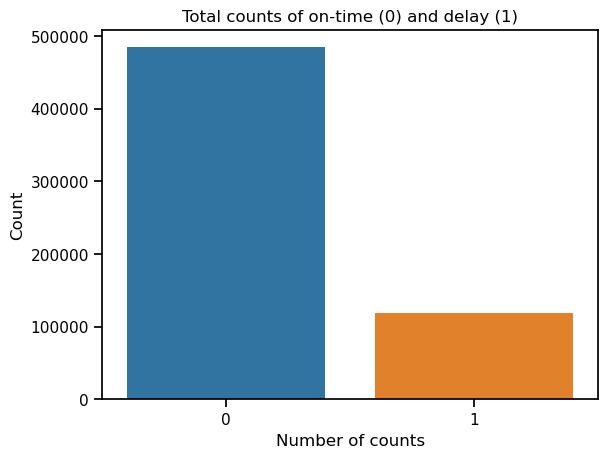

In [27]:
# Output Barplot showing the occurence of flight outcome

sb.set_context("notebook")
g=sb.countplot(x="FLIGHT_STATUS",data=df)
g.set(xlabel="Number of counts", ylabel='Count')
g.set_title('Total counts of on-time (0) and delay (1)')

/Users/tunguyen/miniconda3/envs/progLab/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tunguyen/miniconda3/envs/progLab/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tunguyen/miniconda3/envs/progLab/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0.5, 0, 'Number of counts')]

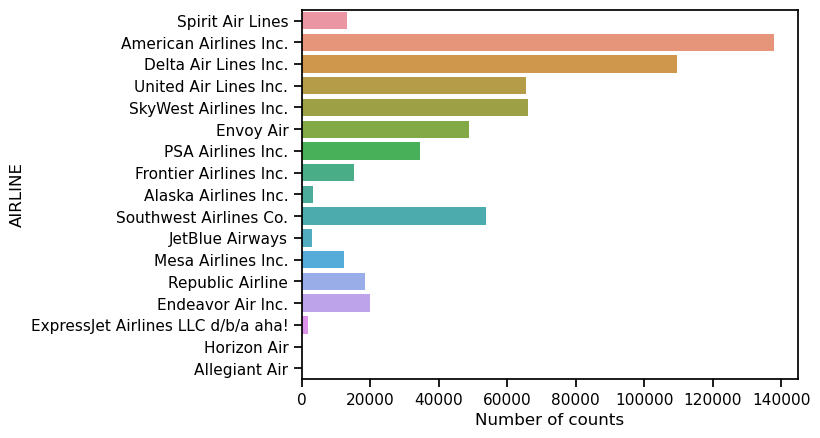

In [28]:
# Compare the occurrences of each airline
sb.set_context("notebook")
g=sb.countplot(y="AIRLINE",data=df_category)
g.set(xlabel="Number of counts")

In [30]:
print(df[['FL_DATE', 'AIRLINE', 'ARR_DELAY']].sort_values(by='ARR_DELAY', ascending=False).head(10))
longest_delay = df[['ARR_DELAY']].sort_values(by='ARR_DELAY', ascending=False).iloc[0]

print(f"The longest delay is {longest_delay['ARR_DELAY']} minutes.")

           FL_DATE                 AIRLINE  ARR_DELAY
2639771 2022-03-26  American Airlines Inc.     2934.0
2210421 2023-08-25  American Airlines Inc.     2913.0
2026734 2022-11-10  American Airlines Inc.     2911.0
1899200 2023-05-31  American Airlines Inc.     2900.0
518982  2023-08-17  American Airlines Inc.     2685.0
1541563 2020-12-04  American Airlines Inc.     2568.0
497414  2021-02-20  American Airlines Inc.     2556.0
1407887 2022-02-09  American Airlines Inc.     2193.0
988558  2022-07-11  American Airlines Inc.     2100.0
338759  2019-10-30      Mesa Airlines Inc.     2034.0
The longest delay is 2934.0 minutes.


/Users/tunguyen/miniconda3/envs/progLab/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tunguyen/miniconda3/envs/progLab/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tunguyen/miniconda3/envs/progLab/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


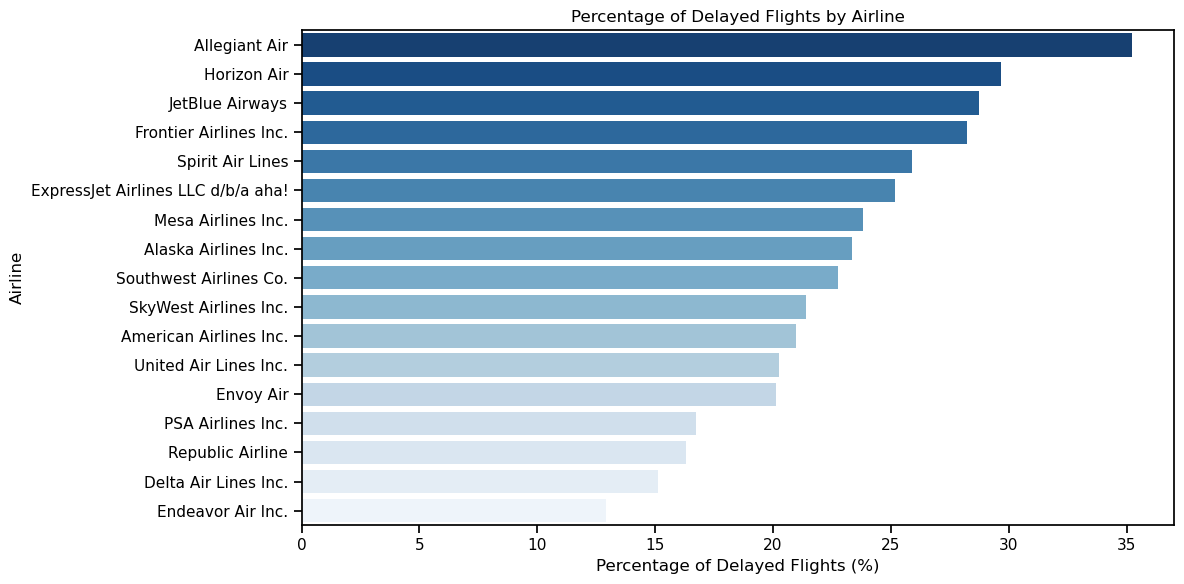

In [72]:
# Group by airline and calculate average delay
airline_delays = df.groupby('AIRLINE')['FLIGHT_STATUS'].mean().reset_index()
airline_delays['FLIGHT_STATUS'] = airline_delays['FLIGHT_STATUS'] * 100  # Convert to percentage

airline_delays = airline_delays.sort_values(by='FLIGHT_STATUS', ascending=False)

plt.figure(figsize=(12, 6))
sb.barplot(data=airline_delays, x='FLIGHT_STATUS', y='AIRLINE', palette='Blues_r')

# Add labels and title
plt.title('Percentage of Delayed Flights by Airline')
plt.xlabel('Percentage of Delayed Flights (%)')
plt.ylabel('Airline')
plt.tight_layout()

plt.show()

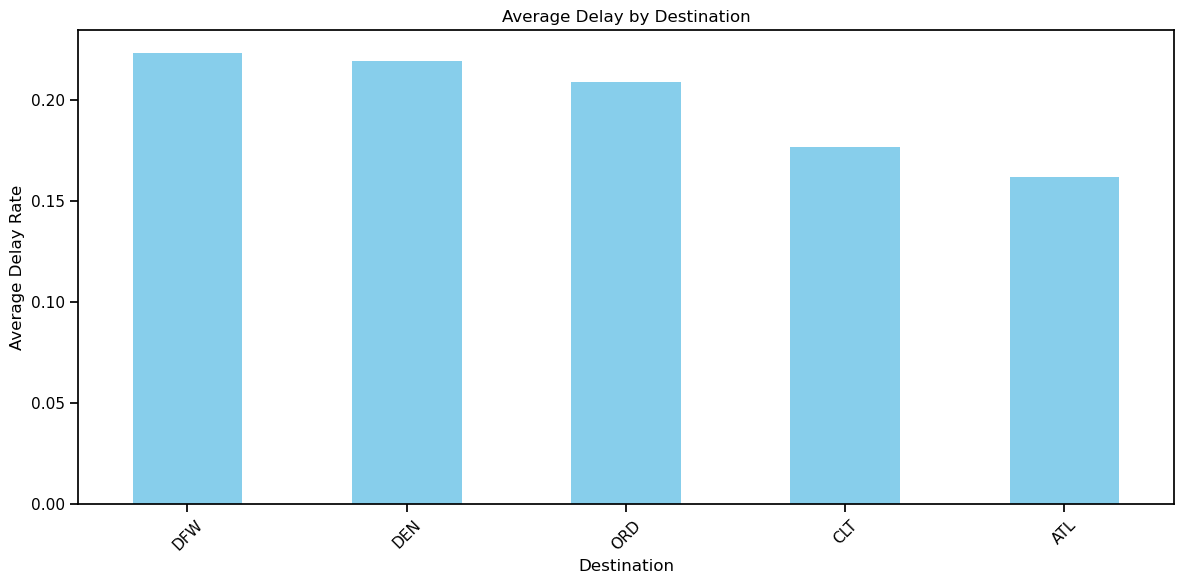

In [31]:
avg_delay_by_dest = df.groupby('DEST')['FLIGHT_STATUS'].mean().sort_values(ascending=False)

# Plot the average delay
plt.figure(figsize=(12, 6))
avg_delay_by_dest.plot(kind='bar', color='skyblue')
plt.title('Average Delay by Destination')
plt.xlabel('Destination')
plt.ylabel('Average Delay Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/Users/tunguyen/miniconda3/envs/progLab/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tunguyen/miniconda3/envs/progLab/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


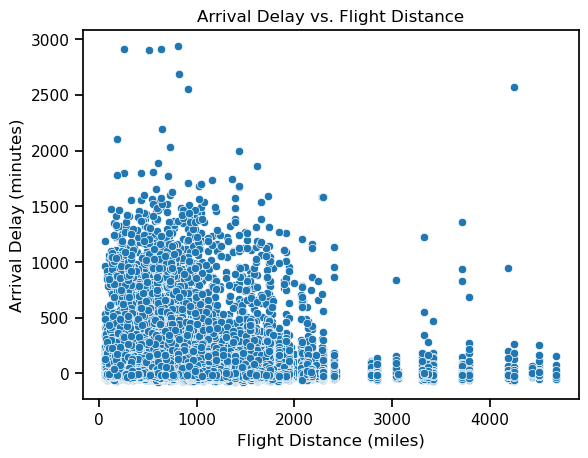

In [32]:
# The relationship between arrival delay and flight distance
sb.scatterplot(x='DISTANCE', y='ARR_DELAY', data=df)
plt.xlabel('Flight Distance (miles)')
plt.ylabel('Arrival Delay (minutes)')
plt.title('Arrival Delay vs. Flight Distance')
plt.show()

## Feature engineering
1. Created `Year`, `Quarter`, `Month`, `DayofMonth`, `HourofDay` to capture timely demand.
2. Aggregated average taxi times (`AVG_TAXI_OUT` and `AVG_TAXI_IN`) for each airport.
3. Dropped irrelevant features, i.e., text with no predictive power.
4. Upon correlation analysis, drop features with little predictive power or features that have overlaps with others.
5. Features that directly leaks the outcome is dropped (`ARR_DELAY`)
6. Encoded categorical variables using **Label Encoding**.

In [33]:
# Extracting Year, Quarter, Month, and DayofMonth into separate columns
df['Year'] = df['FL_DATE'].dt.year
df['Quarter'] = df['FL_DATE'].dt.quarter
df['Month'] = df['FL_DATE'].dt.month
df['DayofMonth'] = df['FL_DATE'].dt.day
df['HourofDay'] = df['DEP_TIME'].apply(lambda x: x.hour)

In [35]:
# Create new columns for average taxi time for each airport
# Average taxi-out time for each origin airport
avg_taxi_out = df.groupby('ORIGIN')['TAXI_OUT'].mean().rename('AVG_TAXI_OUT')

# Average taxi-in time for each destination airport
avg_taxi_in = df.groupby('DEST')['TAXI_IN'].mean().rename('AVG_TAXI_IN')

# Merge with the original DataFrame
df = df.merge(avg_taxi_out, on='ORIGIN', how='left')
df = df.merge(avg_taxi_in, on='DEST', how='left')

In [36]:
df.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_OFF_elapse,WHEELS_ON_elapse,FLIGHT_STATUS,Year,Quarter,Month,DayofMonth,HourofDay,AVG_TAXI_OUT,AVG_TAXI_IN
0,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",18:40:00,18:38:00,-2.0,15.0,18:53:00,20:26:00,14.0,20:41:00,20:40:00,-1.0,0.0,0.0,181.0,182.0,153.0,985.0,15.0,14.0,0,2020,1,2,23,18,17.404827,11.861941
1,2020-07-31,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,2107,RDU,"Raleigh/Durham, NC",DFW,"Dallas/Fort Worth, TX",12:07:00,12:01:00,-6.0,14.0,12:15:00,13:46:00,11.0,13:58:00,13:57:00,-1.0,0.0,0.0,171.0,176.0,151.0,1061.0,14.0,11.0,0,2020,3,7,31,12,17.876359,11.861941
2,2019-11-20,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1065,BDL,"Hartford, CT",ATL,"Atlanta, GA",06:00:00,05:55:00,-5.0,15.0,06:10:00,08:02:00,6.0,08:40:00,08:08:00,-32.0,0.0,0.0,160.0,133.0,112.0,859.0,15.0,6.0,0,2019,4,11,20,5,14.233696,8.286905
3,2020-07-01,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1225,STT,"Charlotte Amalie, VI",ATL,"Atlanta, GA",16:15:00,16:13:00,-2.0,15.0,16:28:00,19:45:00,3.0,19:57:00,19:48:00,-9.0,0.0,0.0,222.0,215.0,197.0,1599.0,15.0,3.0,0,2020,3,7,1,16,13.950764,8.286905
4,2019-03-17,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1157,SRQ,"Sarasota/Bradenton, FL",ORD,"Chicago, IL",16:15:00,16:11:00,-4.0,31.0,16:42:00,18:38:00,12.0,18:15:00,18:50:00,35.0,0.0,0.0,180.0,219.0,176.0,1050.0,31.0,12.0,1,2019,1,3,17,16,14.466350,13.153149


In [37]:
df['AVG_TAXI_OUT'] = df['AVG_TAXI_OUT'].round(4)
df['AVG_TAXI_IN'] = df['AVG_TAXI_IN'].round(4)

In [38]:
# There are several columns that have no predictive power at all and therefore will be dropped
columns_to_drop = ['FL_DATE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'FL_NUMBER', 'DOT_CODE', 
                   'ORIGIN_CITY', 'DEST_CITY', 'CANCELLED', 'DIVERTED', 'Quarter']

df.drop(columns_to_drop, axis=1, inplace=True)

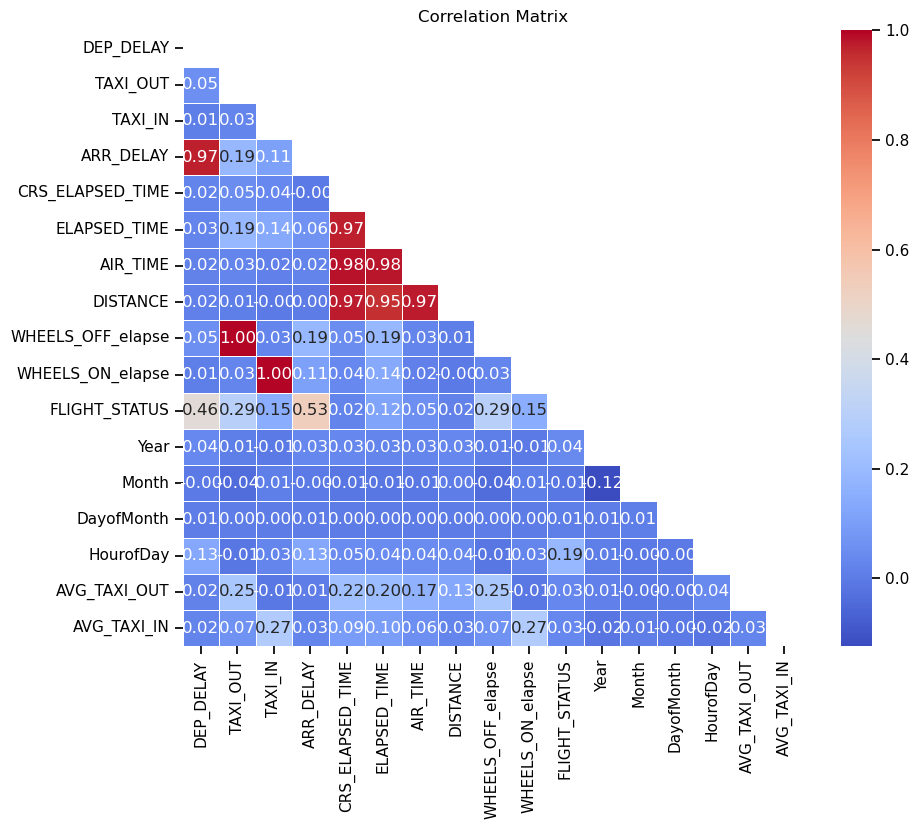

In [39]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr = numeric_columns.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix')
plt.show()

In [40]:
# Filter correlation matrix for values greater than 0.9
high_corr = corr[(corr > 0.9) & (corr < 1.0)]

# Get the column pairs with high positive correlation
high_corr_pairs = [(column1, column2, corr.loc[column1, column2]) for column1 in high_corr.columns for column2 in high_corr.index if high_corr.loc[column2, column1] > 0]

# Create a DataFrame to display the column pairs and their correlation values
high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Column 1', 'Column 2', 'Correlation'])
high_corr_df

,Column 1,Column 2,Correlation
0,DEP_DELAY,ARR_DELAY,0.970815
1,ARR_DELAY,DEP_DELAY,0.970815
2,CRS_ELAPSED_TIME,ELAPSED_TIME,0.969367
3,CRS_ELAPSED_TIME,AIR_TIME,0.983279
4,CRS_ELAPSED_TIME,DISTANCE,0.974033
5,ELAPSED_TIME,CRS_ELAPSED_TIME,0.969367
6,ELAPSED_TIME,AIR_TIME,0.979451
7,ELAPSED_TIME,DISTANCE,0.950077
8,AIR_TIME,CRS_ELAPSED_TIME,0.983279
9,AIR_TIME,ELAPSED_TIME,0.979451


In [41]:
# Calculate the difference between CRS_ELAPSED_TIME and ELAPSED_TIME
df['ELAPSED_TIME_DIFF'] = df['ELAPSED_TIME'] - df['CRS_ELAPSED_TIME']

print(df[['CRS_ELAPSED_TIME', 'ELAPSED_TIME', 'ELAPSED_TIME_DIFF']])

        CRS_ELAPSED_TIME  ELAPSED_TIME  ELAPSED_TIME_DIFF
0                  181.0         182.0                1.0
1                  171.0         176.0                5.0
2                  160.0         133.0              -27.0
3                  222.0         215.0               -7.0
4                  180.0         219.0               39.0
...                  ...           ...                ...
603479             162.0         149.0              -13.0
603480             169.0         158.0              -11.0
603481             154.0         155.0                1.0
603482              85.0          71.0              -14.0
603483              55.0          50.0               -5.0

[603484 rows x 3 columns]


In [42]:
columns_to_drop = ['CRS_DEP_TIME','DEP_TIME','CRS_ARR_TIME','ARR_TIME','CRS_ELAPSED_TIME', 'ELAPSED_TIME', 'AIR_TIME','WHEELS_OFF','WHEELS_ON']
df = df.drop(columns_to_drop, axis=1)

In [43]:
df = df.drop(['WHEELS_OFF_elapse','WHEELS_ON_elapse'], axis=1)

In [44]:
df.head()

,AIRLINE,ORIGIN,DEST,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,DISTANCE,FLIGHT_STATUS,Year,Month,DayofMonth,HourofDay,AVG_TAXI_OUT,AVG_TAXI_IN,ELAPSED_TIME_DIFF
0,Spirit Air Lines,MCO,DFW,-2.0,15.0,14.0,-1.0,985.0,0,2020,2,23,18,17.4048,11.8619,1.0
1,American Airlines Inc.,RDU,DFW,-6.0,14.0,11.0,-1.0,1061.0,0,2020,7,31,12,17.8764,11.8619,5.0
2,Delta Air Lines Inc.,BDL,ATL,-5.0,15.0,6.0,-32.0,859.0,0,2019,11,20,5,14.2337,8.2869,-27.0
3,Delta Air Lines Inc.,STT,ATL,-2.0,15.0,3.0,-9.0,1599.0,0,2020,7,1,16,13.9508,8.2869,-7.0
4,United Air Lines Inc.,SRQ,ORD,-4.0,31.0,12.0,35.0,1050.0,1,2019,3,17,16,14.4664,13.1531,39.0


In [45]:
# Drop Year, Month, DayofMonth due to their little predictive power
df = df.drop(['DayofMonth','Month','Year'], axis=1)

# Finally drop ARR_DELAY because it directly leaks the outcome
df = df.drop(['ARR_DELAY'], axis=1)

In [46]:
df.head()

,AIRLINE,ORIGIN,DEST,DEP_DELAY,TAXI_OUT,TAXI_IN,DISTANCE,FLIGHT_STATUS,HourofDay,AVG_TAXI_OUT,AVG_TAXI_IN,ELAPSED_TIME_DIFF
0,Spirit Air Lines,MCO,DFW,-2.0,15.0,14.0,985.0,0,18,17.4048,11.8619,1.0
1,American Airlines Inc.,RDU,DFW,-6.0,14.0,11.0,1061.0,0,12,17.8764,11.8619,5.0
2,Delta Air Lines Inc.,BDL,ATL,-5.0,15.0,6.0,859.0,0,5,14.2337,8.2869,-27.0
3,Delta Air Lines Inc.,STT,ATL,-2.0,15.0,3.0,1599.0,0,16,13.9508,8.2869,-7.0
4,United Air Lines Inc.,SRQ,ORD,-4.0,31.0,12.0,1050.0,1,16,14.4664,13.1531,39.0


## Model Building

### Final features
- Before training our models, `TAXI_IN`, `TAXI_OUT` are removed from the features because these are better represented by the average taxi time at an airport (`AVG_TAXI_IN` and `AVG_TAXI_OUT`). `ELAPSED_TIME_DIFF` is also removed because this feature directly links to the outcome of the flight status. The elapsed time difference is calculated after the plane already arrived at the destination airport and has no impact on post-departure prediction. The `DEP_DELAY` feature is remained because even when a flight is delayed at its origin, there is a chance it can still make it to the destination on time.
- The final features used to predict `FLIGHT_STATUS` are:
  1. AIRLINE
  2. ORIGIN
  3. DEST
  4. DEP_DELAY
  5. DISTANCE
  6. HourofDay
  7. AVG_TAXI_OUT
  8. AVG_TAXI_IN
 
### The Model
1. Split the data into training and testing sets (80-20)
2. Handle class imbalance using:
   - **Class Weights** in Random Forest
3. Train a **Random Forest Classifier**.
4. Evaluate the model using accuracy, precision, recall, F1-score.

### Why Random Forest?
- Handles non-linear relationships well.
- Provides feature importance for better interpretability.
- Robust to outliers and noise.

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Prepare features and target
X = df.drop(['FLIGHT_STATUS', 'TAXI_OUT', 'TAXI_IN', 'ELAPSED_TIME_DIFF'], axis=1)
y = df['FLIGHT_STATUS']

# Label encode categorical variables
label_encoder = LabelEncoder()
for col in ['AIRLINE', 'ORIGIN', 'DEST']:
    X[col] = label_encoder.fit_transform(X[col])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=300,
    class_weight='balanced',
    max_depth=10,
    min_samples_split=5,
    random_state=42
)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     96882
           1       0.76      0.75      0.76     23815

    accuracy                           0.90    120697
   macro avg       0.85      0.85      0.85    120697
weighted avg       0.90      0.90      0.90    120697

Confusion Matrix:
[[91395  5487]
 [ 6029 17786]]


In [77]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})

# Sort features by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display the most important features
print("Features importance:")
print(feature_importance.head(10))

Features importance:
        Feature  Importance
3     DEP_DELAY    0.908052
5     HourofDay    0.057591
4      DISTANCE    0.007215
2          DEST    0.006792
0       AIRLINE    0.006065
6  AVG_TAXI_OUT    0.005976
7   AVG_TAXI_IN    0.004413
1        ORIGIN    0.003896


## What do we learn?
1. **Model Performance**:
- The Random Forest model achieved **90% accuracy** and an **F1-score of 0.76** for predicting delayed flights. However, **the recall for delayed flights (75%)** is suboptimal for the aviation industry, where missed delays (false negatives) can lead to **significant economic consequences**, such as increased compensation costs, passenger dissatisfaction, and disrupted operations.
- Improving recall should be prioritized by incorporating features that better capture **pre-departure delay drivers**.

2. **Feature Importance**:
- The model heavily relies on **departure delay (importance: 0.91)**, while other features like **HourofDay (0.06)** and **Distance (0.007)** have minimal impact.
- Departure delay seems only useful for long-haul flights or destination operations but impractical for pre-departure predictions.

3. **Limitations and Recommendations**:
- The dataset lacks critical features such as **historical delay trends** and **weather data**, which are essential for robust pre-departure prediction.
- Removing **DEP_DELAY** drastically reduces the model's performance, highlighting the need to focus on pre-flight predictors like airline and airport delay history or weather.

4. **In one sentence?**
- The model is excellent if your passengers are already aboard and you want to see whether they are going to make it on time.
